### Cài đặt các thư viện cần thiết

In [1]:
NAME = 'Hồ Thành Đạt - 6351071017'

In [2]:
!pip install tensorflow scikit-learn matplotlib seaborn numpy

### a) Đọc bộ dữ liệu train, test của MNIST từ Keras

In [3]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

# a) Đọc bộ dữ liệu
print(NAME)
(train_images, train_labels), (test_images, test_labels) = keras.datasets.mnist.load_data()

Hồ Thành Đạt - 6351071017
11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


### b) In ra kích thước của tập train, test

In [4]:
print(NAME)

print('Kích thước tập train ban đầu:', train_images.shape)
print('Kích thước tập test:', test_images.shape)
print('Số lượng nhãn train:', len(train_labels))
print('Số lượng nhãn test:', len(test_labels))

Hồ Thành Đạt - 6351071017
Kích thước tập train ban đầu: (60000, 28, 28)
Kích thước tập test: (10000, 28, 28)
Số lượng nhãn train: 60000
Số lượng nhãn test: 10000


### c) Chuẩn hóa các giá trị pixel của ảnh về đoạn [0,1]

In [5]:
print(NAME)
train_images_original = train_images
test_images_original = test_images

train_images = train_images / 255.0
test_images = test_images / 255.0

Hồ Thành Đạt - 6351071017


### d) Chia tập train ban đầu thành tập train và tập validation theo tỷ lệ 8:2

In [6]:
from sklearn.model_selection import train_test_split

print(NAME)
# Chia dữ liệu huấn luyện thành tập huấn luyện và tập xác thực
train_images, validation_images, train_labels, validation_labels = train_test_split(
    train_images, train_labels, test_size=0.2, random_state=42, stratify=train_labels
)

print('Kích thước tập train mới:', train_images.shape)
print('Kích thước tập validation:', validation_images.shape)
print('Số lượng nhãn train mới:', len(train_labels))
print('Số lượng nhãn validation:', len(validation_labels))

Hồ Thành Đạt - 6351071017
Kích thước tập train mới: (48000, 28, 28)
Kích thước tập validation: (12000, 28, 28)
Số lượng nhãn train mới: 48000
Số lượng nhãn validation: 12000


### e) Xây dựng Neural Network

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout

print(NAME)
model = Sequential ([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(10, activation='softmax')
])

model.summary()

Hồ Thành Đạt - 6351071017


/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

### f) Biên dịch mô hình

In [8]:
print(NAME)
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Hồ Thành Đạt - 6351071017


### g) Huấn luyện mô hình

In [9]:
print(NAME)
history = model.fit(train_images, train_labels,
                    epochs=5,
                    batch_size=32,
                    validation_data=(validation_images, validation_labels))

Hồ Thành Đạt - 6351071017
Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 21s 12ms/step - accuracy: 0.8441 - loss: 0.5374 - val_accuracy: 0.9492 - val_loss: 0.1698
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9516 - loss: 0.1663 - val_accuracy: 0.9593 - val_loss: 0.1351
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9641 - loss: 0.1178 - val_accuracy: 0.9692 - val_loss: 0.1024
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9704 - loss: 0.0945 - val_accuracy: 0.9708 - val_loss: 0.0974
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9731 - loss: 0.0835 - val_accuracy: 0.9746 - val_loss: 0.0865


### h) Vẽ biểu đồ thể hiện accuracy, loss sau mỗi epoch

Hồ Thành Đạt - 6351071017


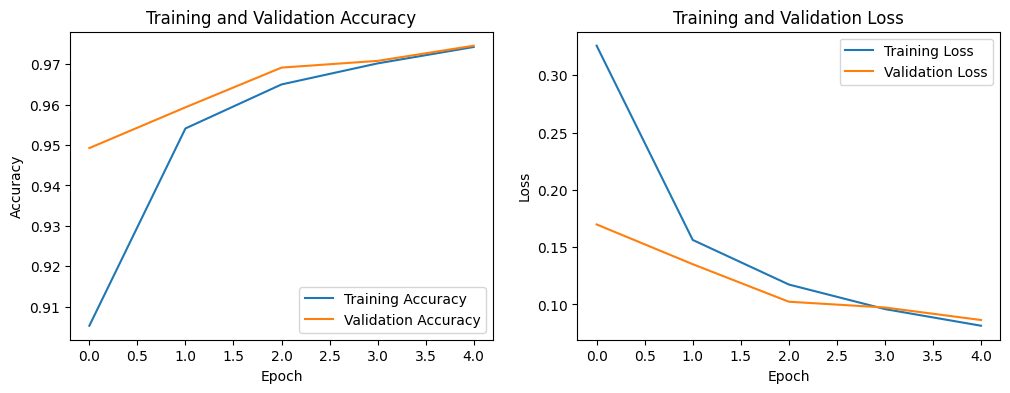

In [10]:
import matplotlib.pyplot as plt

print(NAME)
# Vẽ biểu đồ accuracy
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Vẽ biểu đồ loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

### i) Dự đoán phân lớp cho tập test

In [11]:
print(NAME)
predictions = model.predict(test_images)
predicted_labels = np.argmax(predictions, axis=1)

Hồ Thành Đạt - 6351071017
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


### j) Tính và in ra Accuracy của mô hình trên tập test

In [12]:
from sklearn.metrics import accuracy_score

print(NAME)
accuracy = accuracy_score(test_labels, predicted_labels)
print(f'Accuracy trên tập test: {accuracy}')

Hồ Thành Đạt - 6351071017
Accuracy trên tập test: 0.9754


### k) Tính và in ra Precision, Recall, F1-score của từng lớp và trung bình của mô hình trên tập test

In [13]:
from sklearn.metrics import classification_report

print(NAME)
print(classification_report(test_labels, predicted_labels))

Hồ Thành Đạt - 6351071017
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.97      0.97      1032
           3       0.97      0.98      0.97      1010
           4       0.97      0.98      0.98       982
           5       0.98      0.97      0.98       892
           6       0.98      0.98      0.98       958
           7       0.98      0.97      0.97      1028
           8       0.96      0.97      0.97       974
           9       0.98      0.95      0.96      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



### l) Hiển thị confusion matrix bằng heat map (bản đồ nhiệt)

Hồ Thành Đạt - 6351071017


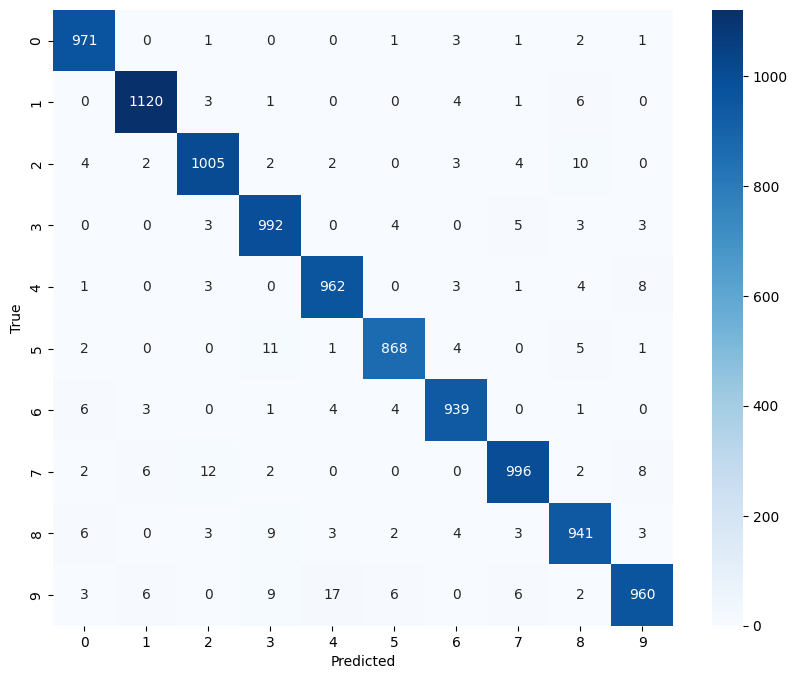

In [14]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

print(NAME)
cm = confusion_matrix(test_labels, predicted_labels)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

### m) In ra kết quả phân lớp của 05 ảnh đầu tiên trong tập test

Hồ Thành Đạt - 6351071017


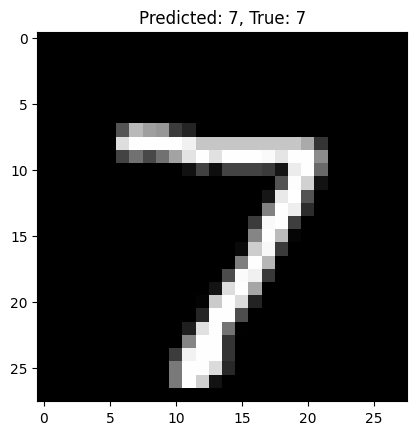

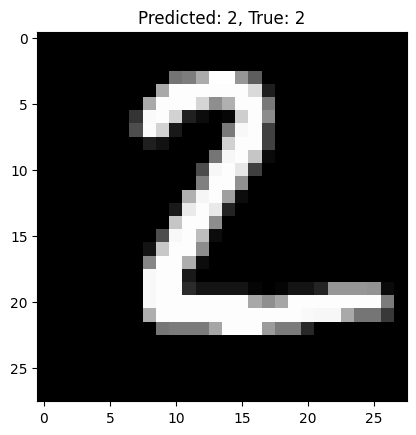

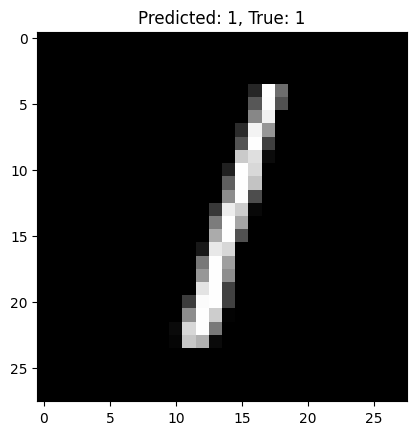

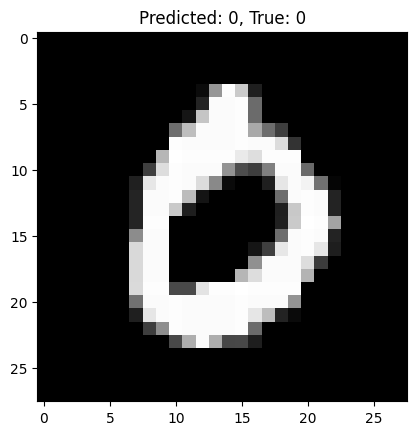

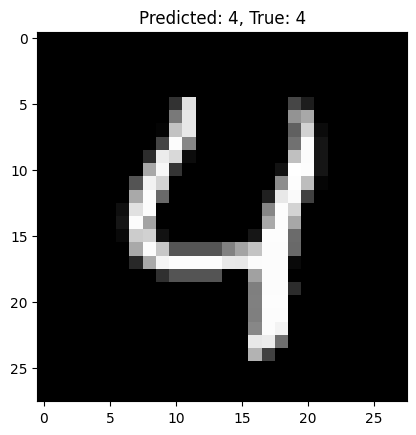

In [15]:
print(NAME)
for i in range(5):
    plt.imshow(test_images_original[i], cmap='gray')
    plt.title(f'Predicted: {predicted_labels[i]}, True: {test_labels[i]}')
    plt.show()

### n) In ra 05 kết quả đầu tiên phân lớp sai so với nhãn thực tế trong tập test

Hồ Thành Đạt - 6351071017


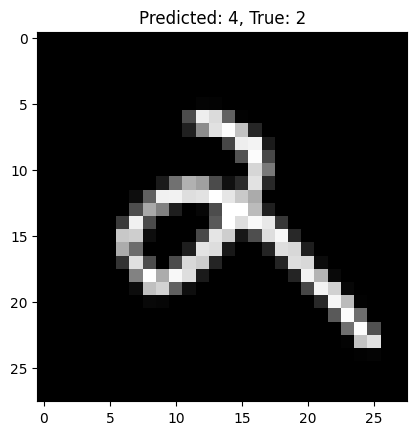

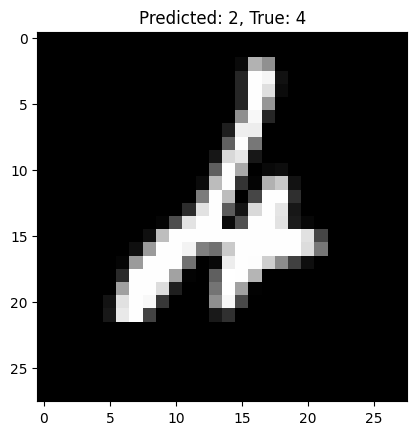

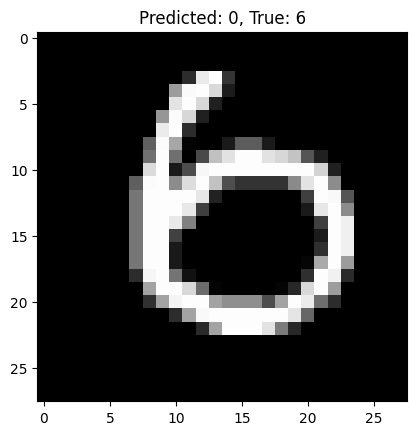

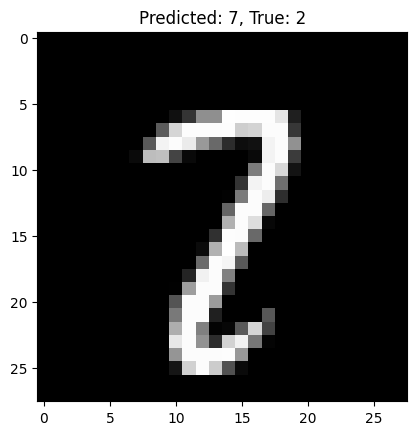

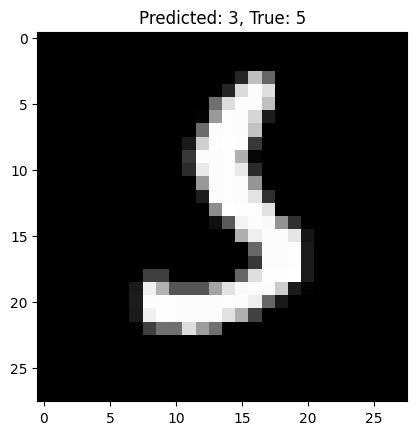

In [16]:
print(NAME)
misclassified_indices = np.where(predicted_labels != test_labels)[0]
for i in range(5):
    idx = misclassified_indices[i]
    plt.imshow(test_images_original[idx], cmap='gray')
    plt.title(f'Predicted: {predicted_labels[idx]}, True: {test_labels[idx]}')
    plt.show()